In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'D:\ind_data_valid\CST_OP_COLLECTION.csv')

C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\3658045364.py:5: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\ind_data_valid\CST_OP_COLLECTION.csv')


In [16]:
df.head()

,EQUIP_NO,PLC_NO,REPORT_DATE,REPORT_TIME,CUST_ID,DATA1,DATA2,DATA3,DATA4,DATA5,...,DATA22,DATA23,DATA24,DATA25,CREATE_DATE,EQUIP_DATE,VERIFY_YN,VERIFY_ERR_IDX,VERIFY_DATE,datetime
0,80500336802010,175.223.31.129,20201028,1420,33680.0,136,0,112.621,112.342,112.106,...,-14.077,11.0,0.0,NaN,2020-10-28 15:59:40.000,2020-10-28 14:20:11.000,NaN,NaN,2020-10-28 16:01:30.000,2020-10-28 14:20:00
1,80500336802010,175.223.31.129,20201028,1425,33680.0,147,0,112.621,112.342,112.106,...,-14.077,11.0,0.0,NaN,2020-10-28 15:59:40.000,2020-10-28 14:20:11.000,NaN,NaN,2020-10-28 16:01:30.000,2020-10-28 14:25:00
2,80500336802010,175.223.31.129,20201028,1430,33680.0,158,0,112.621,112.342,112.106,...,-14.077,11.0,0.0,NaN,2020-10-28 15:59:40.000,2020-10-28 14:20:11.000,NaN,NaN,2020-10-28 16:01:30.000,2020-10-28 14:30:00
3,80500336802010,175.223.31.129,20201028,1435,33680.0,169,0,112.621,112.342,112.106,...,-14.077,11.0,0.0,NaN,2020-10-28 15:59:40.000,2020-10-28 14:20:11.000,NaN,NaN,2020-10-28 16:01:30.000,2020-10-28 14:35:00
4,80500336802010,175.223.31.129,20201028,1440,33680.0,180,0,112.621,112.342,112.106,...,-14.077,11.0,0.0,NaN,2020-10-28 15:59:40.000,2020-10-28 14:20:11.000,NaN,NaN,2020-10-28 16:01:30.000,2020-10-28 14:40:00


In [3]:
# 1단계: 장비별 가장 많은 데이터를 보유하면서, 불연속적인 데이터가 적은 데이터 식별
df['datetime'] = pd.to_datetime(df['REPORT_DATE'].astype(str) + df['REPORT_TIME'].astype(str).str.zfill(4), format='%Y%m%d%H%M')

In [4]:

# 장비별 데이터 수 확인
equip_data_counts = df.groupby('EQUIP_NO').size().sort_values(ascending=False)
print("장비별 데이터 수:\n", equip_data_counts)


장비별 데이터 수:
 EQUIP_NO
82501456231912    329854
82501457052006     29536
82501457042006     29536
82501456832002     29536
82501456862002     29536
                   ...  
80500336842010     24613
80500336822010     24433
80500336812010     24419
80500336832010     24386
80500336802010     24366
Length: 86, dtype: int64


In [5]:

# 가장 많은 데이터를 가진 장비 식별 (샘플에서는 하나뿐)
most_data_equip = equip_data_counts.index[0]
print(f"\n가장 많은 데이터를 가진 장비: {most_data_equip}")



가장 많은 데이터를 가진 장비: 82501456231912


In [6]:

# 해당 장비의 데이터만 필터링
df_filtered = df[df['EQUIP_NO'] == most_data_equip].copy()
df_filtered = df_filtered.sort_values(by='datetime')



In [7]:
# 시간 간격 분석 (불연속성 확인)
time_diffs = df_filtered['datetime'].diff().dropna()
print(f"\n'{most_data_equip}' 장비의 시간 간격 분포:\n{time_diffs.value_counts().sort_index()}")
if time_diffs.nunique() > 1:
    print("\n경고: 데이터에 불연속적인 시간 간격이 존재할 수 있습니다.")
    print(f"가장 흔한 시간 간격: {time_diffs.mode()[0]}")
else:
    print(f"\n데이터의 시간 간격은 일정합니다: {time_diffs.iloc[0]}")


'82501456231912' 장비의 시간 간격 분포:
datetime
0 days 00:00:00    319590
0 days 00:05:00      9710
0 days 00:10:00       552
0 days 00:15:00         1
Name: count, dtype: int64

경고: 데이터에 불연속적인 시간 간격이 존재할 수 있습니다.
가장 흔한 시간 간격: 0 days 00:00:00



--- DATA 컬럼 통계 및 시각화 (유의미한 데이터 식별) ---

컬럼: DATA1
  고유값 수: 84833
  표준 편차: 42852.651


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

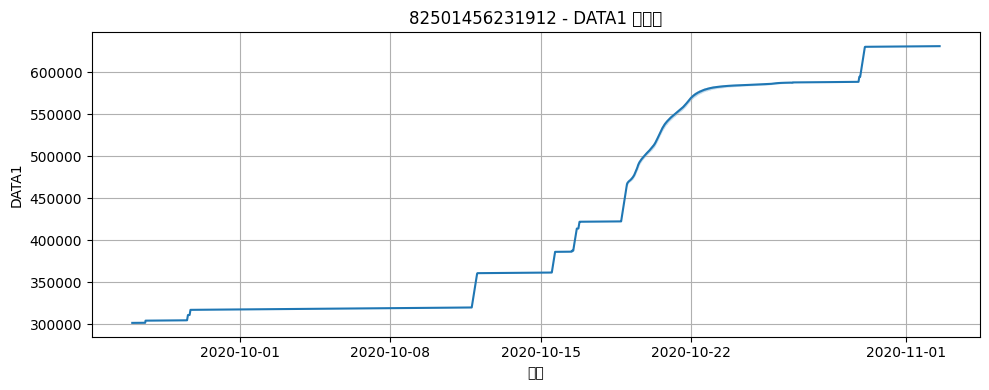


컬럼: DATA2
  고유값 수: 56
  표준 편차: 125.825


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

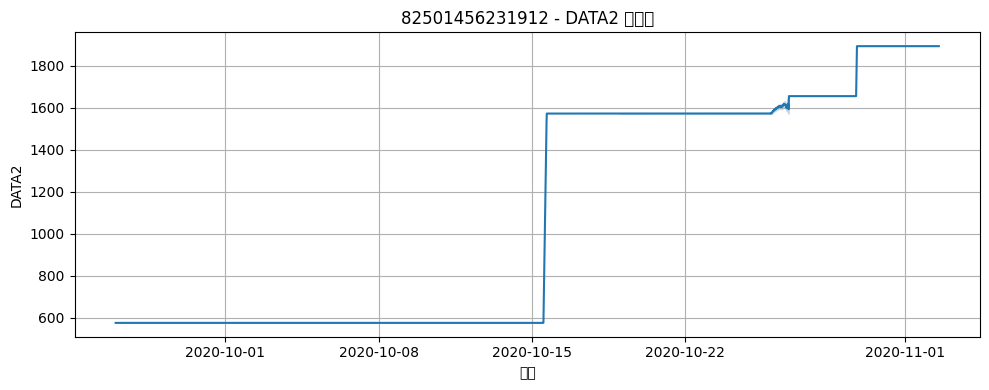


컬럼: DATA3
  고유값 수: 4714
  표준 편차: 1.994


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

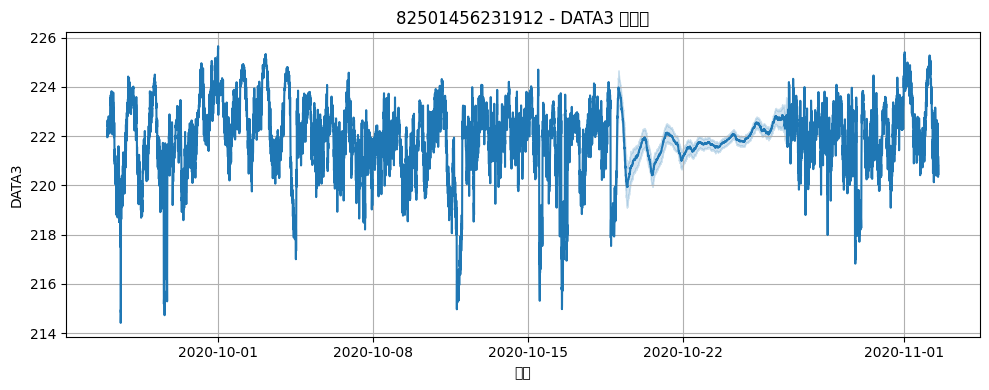


컬럼: DATA4
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA5
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA6
  고유값 수: 329
  표준 편차: 9.838


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

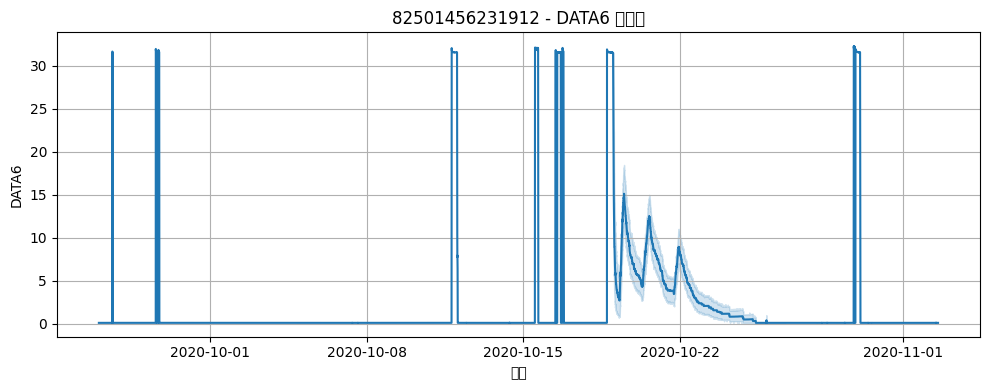


컬럼: DATA7
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA8
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA9
  고유값 수: 2853
  표준 편차: 16.294


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

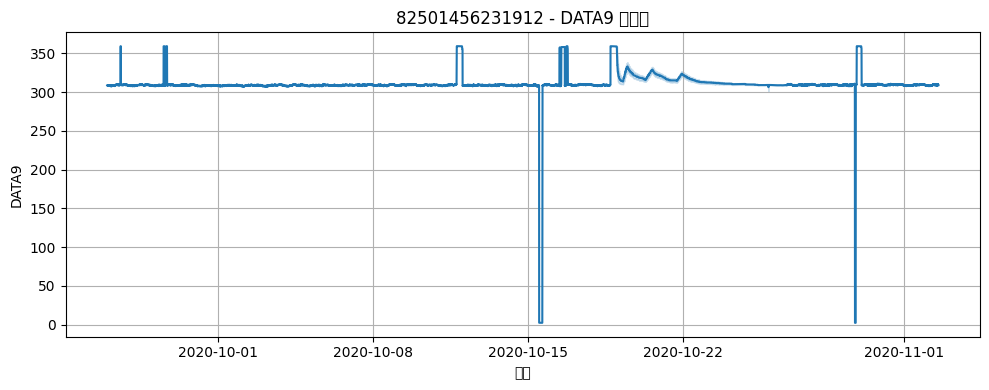


컬럼: DATA10
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA11
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA12
  고유값 수: 3269
  표준 편차: 11.918


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

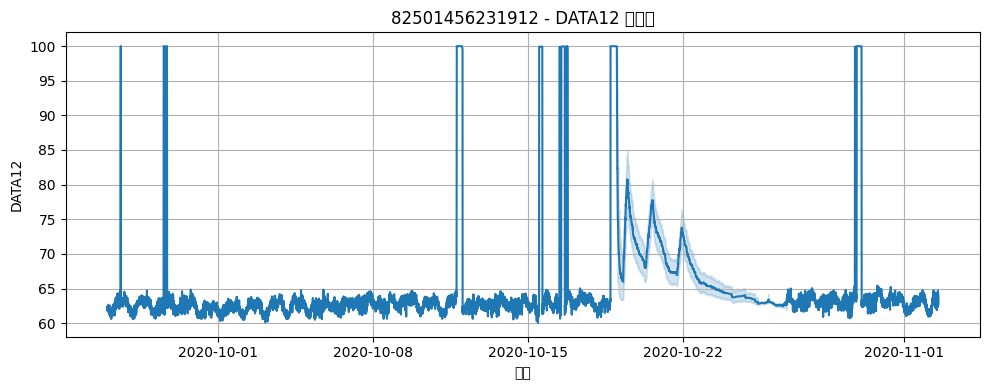


컬럼: DATA13
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA14
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA15
  고유값 수: 984
  표준 편차: 2137.953


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

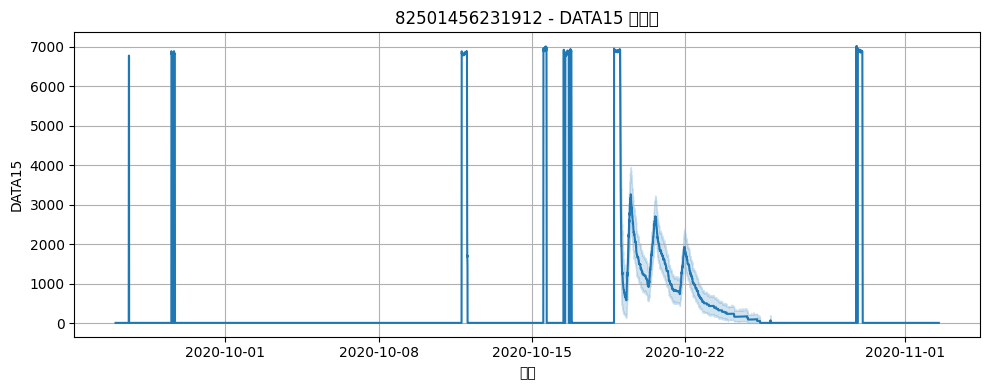


컬럼: DATA16
  고유값 수: 1640
  표준 편차: 61.705


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

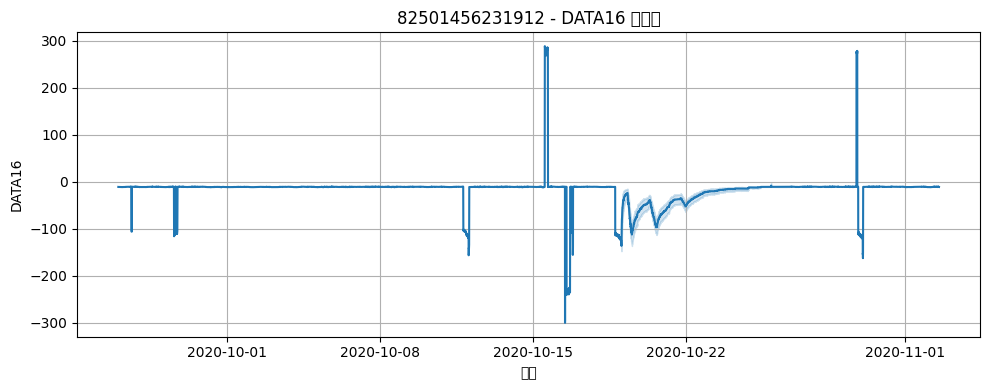


컬럼: DATA17
  고유값 수: 984
  표준 편차: 2137.953


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

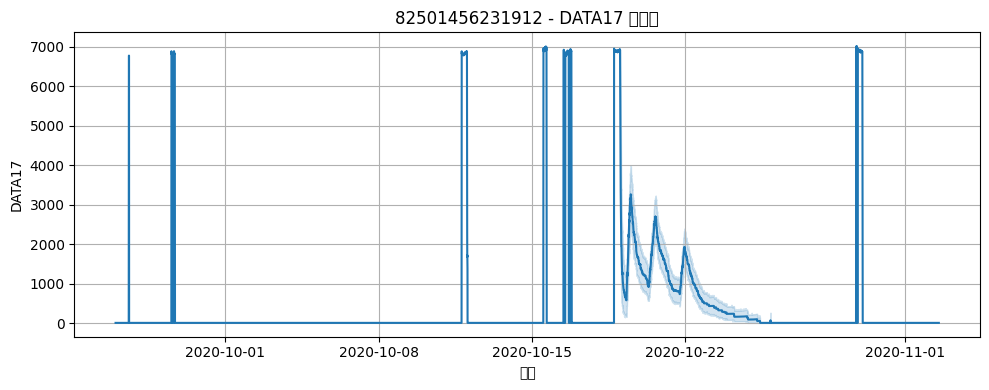


컬럼: DATA18
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA19
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA20
  고유값 수: 1640
  표준 편차: 61.705


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

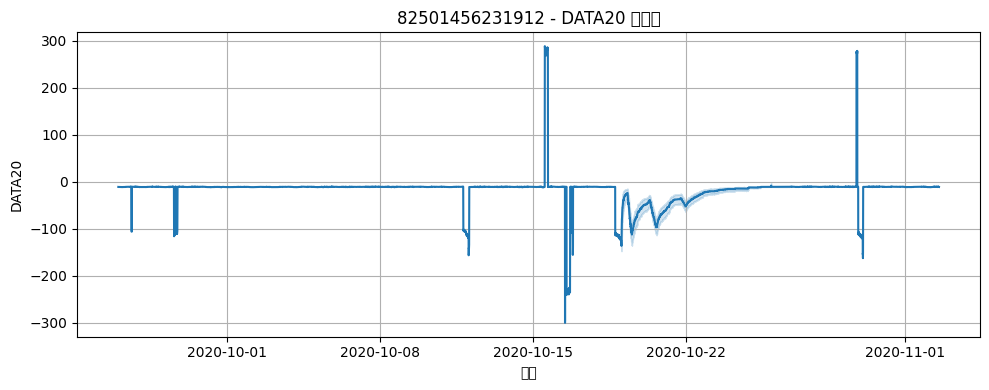


컬럼: DATA21
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA22
  고유값 수: 1
  표준 편차: 0.000
  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)

컬럼: DATA23
  고유값 수: 559
  표준 편차: 75.489


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

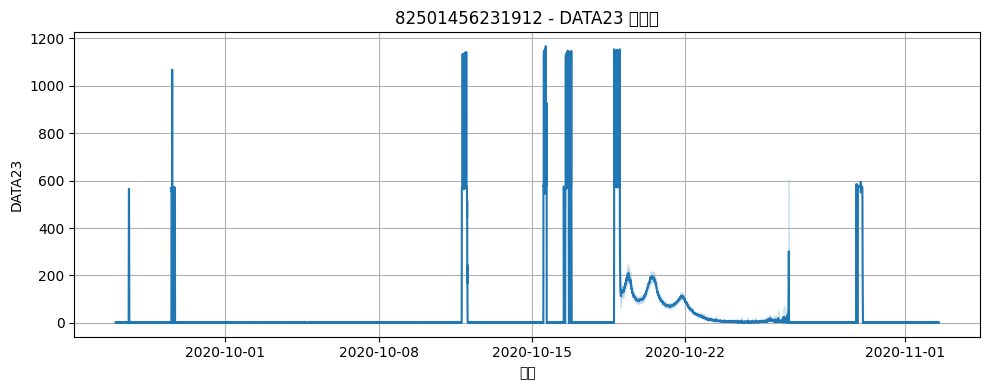


컬럼: DATA24
  고유값 수: 13
  표준 편차: 0.324


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_14800\521527856.py:26: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: Us

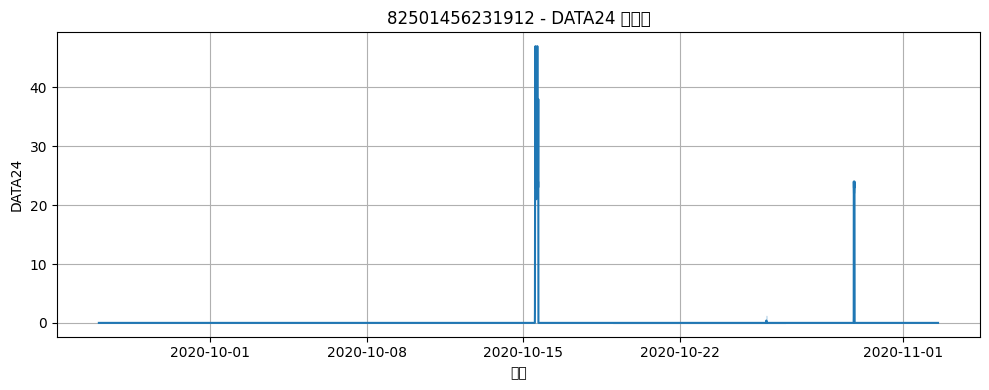


시계열 분석에 유의미하다고 식별된 DATA 컬럼: ['DATA1', 'DATA2', 'DATA3', 'DATA6', 'DATA9', 'DATA12', 'DATA15', 'DATA16', 'DATA17', 'DATA20', 'DATA23', 'DATA24']


In [18]:

# 2단계: 해당 장비의 유의미한 DATA 식별
data_cols = [f'DATA{i}' for i in range(1, 25)]
meaningful_data_cols = []

print("\n--- DATA 컬럼 통계 및 시각화 (유의미한 데이터 식별) ---")
for col in data_cols:
    if col in df_filtered.columns:
        # 고유값 및 표준 편차 확인
        unique_vals = df_filtered[col].nunique()
        std_dev = df_filtered[col].std()
        
        print(f"\n컬럼: {col}")
        print(f"  고유값 수: {unique_vals}")
        print(f"  표준 편차: {std_dev:.3f}")

        # 값이 거의 변하지 않는 데이터는 제외
        if unique_vals > 1 and std_dev > 0.001: # 표준 편차가 매우 작은 경우도 제외
            meaningful_data_cols.append(col)
            # 시각화
            plt.figure(figsize=(10, 4))
            sns.lineplot(x='datetime', y=col, data=df_filtered)
            plt.title(f'{most_data_equip} - {col} 시계열')
            plt.xlabel('시간')
            plt.ylabel(col)
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"  (참고: 이 컬럼은 값이 거의 변하지 않거나 단일 값입니다. 시계열 분석에 부적합할 수 있습니다.)")

print(f"\n시계열 분석에 유의미하다고 식별된 DATA 컬럼: {meaningful_data_cols}")


In [8]:
# 데이터프레임 생성 (Prophet이 요구하는 'ds'와 'y' 컬럼 포함)
df_prophet = pd.DataFrame({
    'ds': df['datetime'],
    'y': df['DATA3']
})

print(f"가상 데이터 생성 완료. 데이터 포인트 수: {len(df_prophet)}")
print(f"가상 데이터 시작일: {df_prophet['ds'].min()}, 종료일: {df_prophet['ds'].max()}")
print(df_prophet.head())
print(df_prophet.tail())

가상 데이터 생성 완료. 데이터 포인트 수: 2814636
가상 데이터 시작일: 2020-09-26 00:00:00, 종료일: 2021-01-06 13:15:00
                   ds        y
0 2020-10-28 14:20:00  112.621
1 2020-10-28 14:25:00  112.621
2 2020-10-28 14:30:00  112.621
3 2020-10-28 14:35:00  112.621
4 2020-10-28 14:40:00  112.621
                         ds        y
2814631 2021-01-06 12:55:00  232.314
2814632 2021-01-06 13:00:00  230.825
2814633 2021-01-06 13:05:00  230.712
2814634 2021-01-06 13:10:00  229.553
2814635 2021-01-06 13:15:00  231.873



--- Prophet 시계열 예측 분석 (DATA3 예측) ---


13:33:37 - cmdstanpy - INFO - Chain [1] start processing
13:34:57 - cmdstanpy - INFO - Chain [1] done processing



--- 1주일 예측 결과 ---
                       ds        yhat  yhat_lower  yhat_upper
12275 2020-11-09 13:10:00  222.275751  203.827985  241.077465
12276 2020-11-09 13:15:00  222.268996  202.964634  241.761844
12277 2020-11-09 13:20:00  222.262395  203.640689  240.821640
12278 2020-11-09 13:25:00  222.255954  203.691106  241.590478
12279 2020-11-09 13:30:00  222.249674  203.258042  241.510312

--- 1개월 예측 결과 ---
                       ds        yhat  yhat_lower  yhat_upper
18899 2020-12-02 13:10:00  223.439453   52.286858  410.841338
18900 2020-12-02 13:15:00  223.435278   50.713385  413.140352
18901 2020-12-02 13:20:00  223.431231   52.026436  411.747500
18902 2020-12-02 13:25:00  223.427317   51.788235  412.947259
18903 2020-12-02 13:30:00  223.423539   50.840151  413.495848


d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

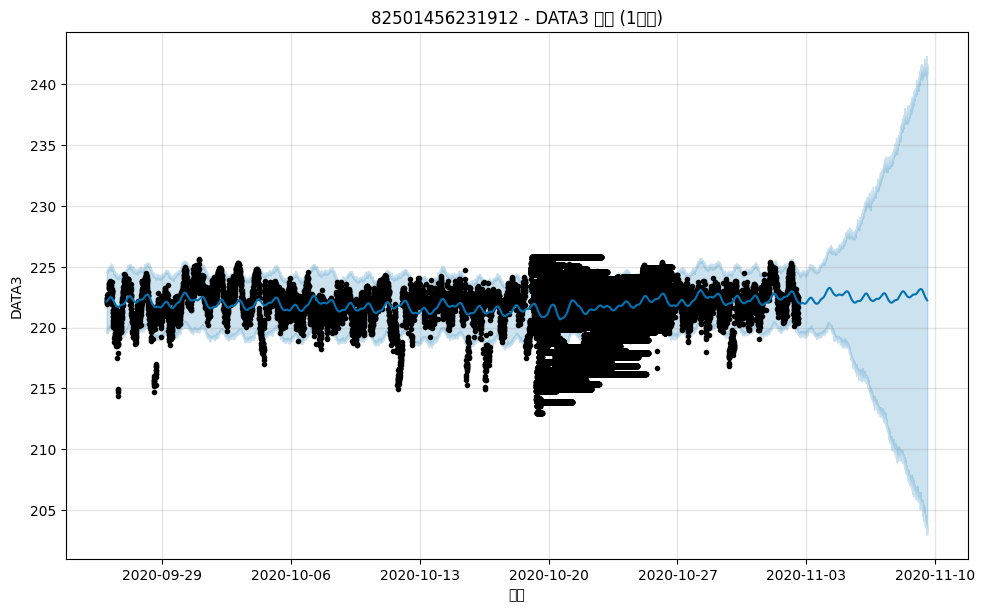

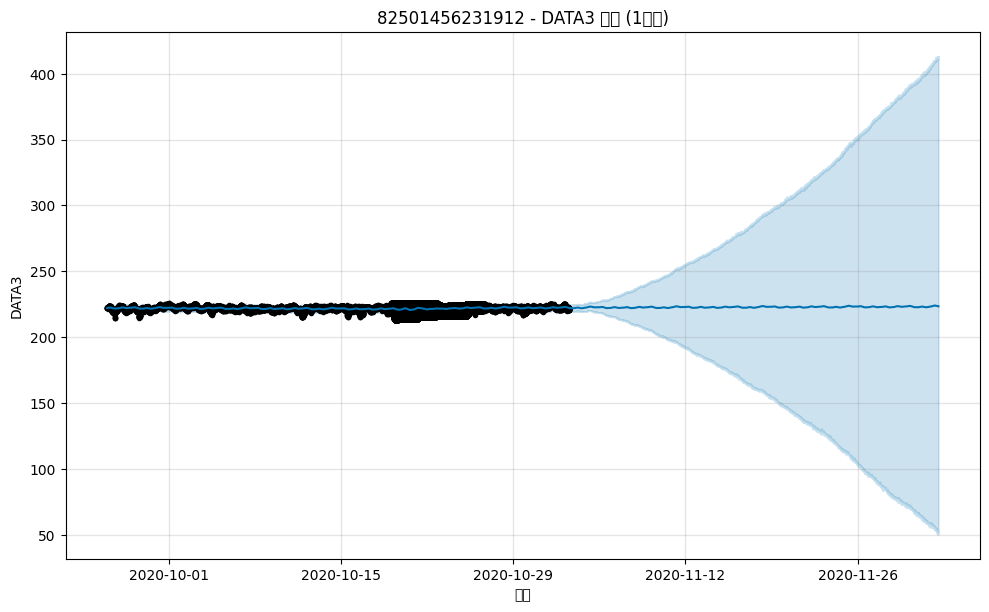

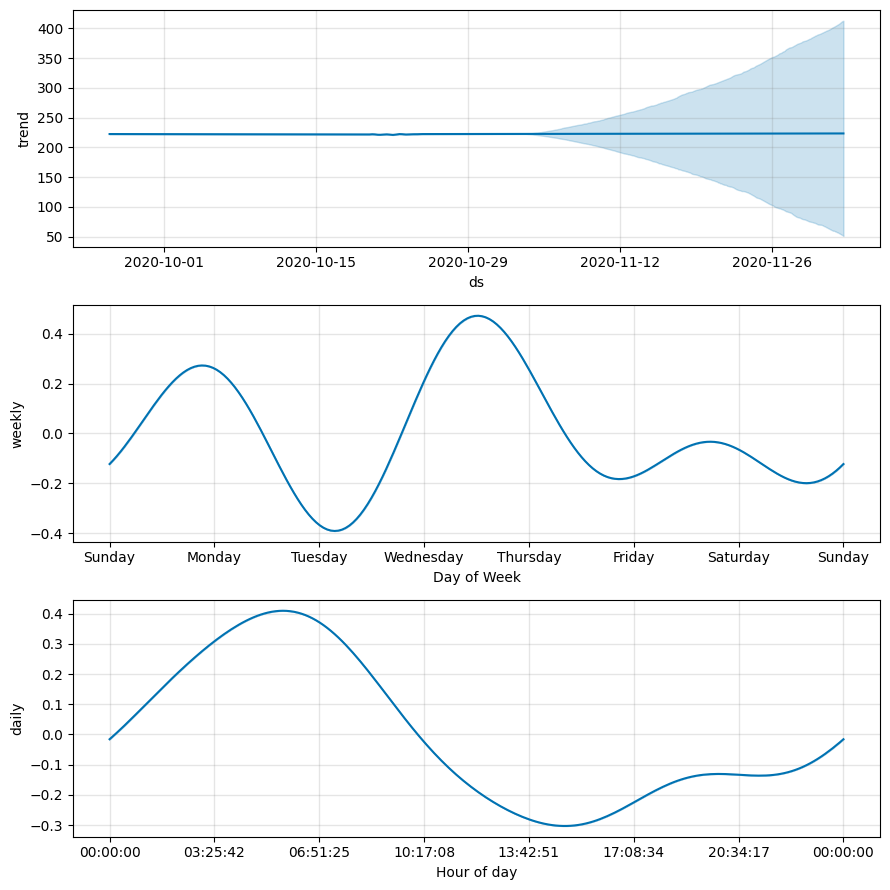

In [10]:
from prophet import Prophet

# 3단계: 시계열 분석을 통한 DATA컬럼의 최소 1주에서부터 1달까지의 시계열 회귀 예측 분석

target_data_col = 'DATA3'
print(f"\n--- Prophet 시계열 예측 분석 ({target_data_col} 예측) ---")

# Prophet 모델을 위한 데이터 준비
df_prophet = df_filtered[['datetime', target_data_col]].rename(columns={'datetime': 'ds', target_data_col: 'y'})

# Prophet 모델 초기화 및 학습
# 일간 데이터가 5분 간격으로 매우 조밀하므로 daily_seasonality=True, weekly_seasonality=True 로 설정합니다.
# Yearly seasonality는 데이터 범위가 짧아(20201028) 현재 데이터로는 의미가 적지만, 전체 데이터셋에서는 고려할 수 있습니다.
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=False) 
model.fit(df_prophet)

# 미래 예측 (1주 및 1달)
# 5분 간격이므로 periods는 일수에 24시간 * 12(5분)를 곱하여 계산
# 1주 (7일) 예측
future_7_days = model.make_future_dataframe(periods=7 * 24 * 12, freq='5min')
forecast_7_days = model.predict(future_7_days)

# 1달 (30일) 예측
future_30_days = model.make_future_dataframe(periods=30 * 24 * 12, freq='5min')
forecast_30_days = model.predict(future_30_days)

print("\n--- 1주일 예측 결과 ---")
print(forecast_7_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

print("\n--- 1개월 예측 결과 ---")
print(forecast_30_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 예측 결과 시각화
fig2 = model.plot(forecast_7_days)
plt.title(f'{most_data_equip} - {target_data_col} 예측 (1개월)')
plt.xlabel('시간')
plt.ylabel(target_data_col)
plt.show()
fig1 = model.plot(forecast_30_days)
plt.title(f'{most_data_equip} - {target_data_col} 예측 (1개월)')
plt.xlabel('시간')
plt.ylabel(target_data_col)
plt.show()

# 예측 구성 요소 시각화 (추세, 계절성)
fig2 = model.plot_components(forecast_30_days)
plt.show()


C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2908241574.py:18: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2908241574.py:18: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2908241574.py:18: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2908241574.py:18: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2908241574.py:18: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2908241574.py:18: UserWarning: Glyph 51109 (\N{HAN

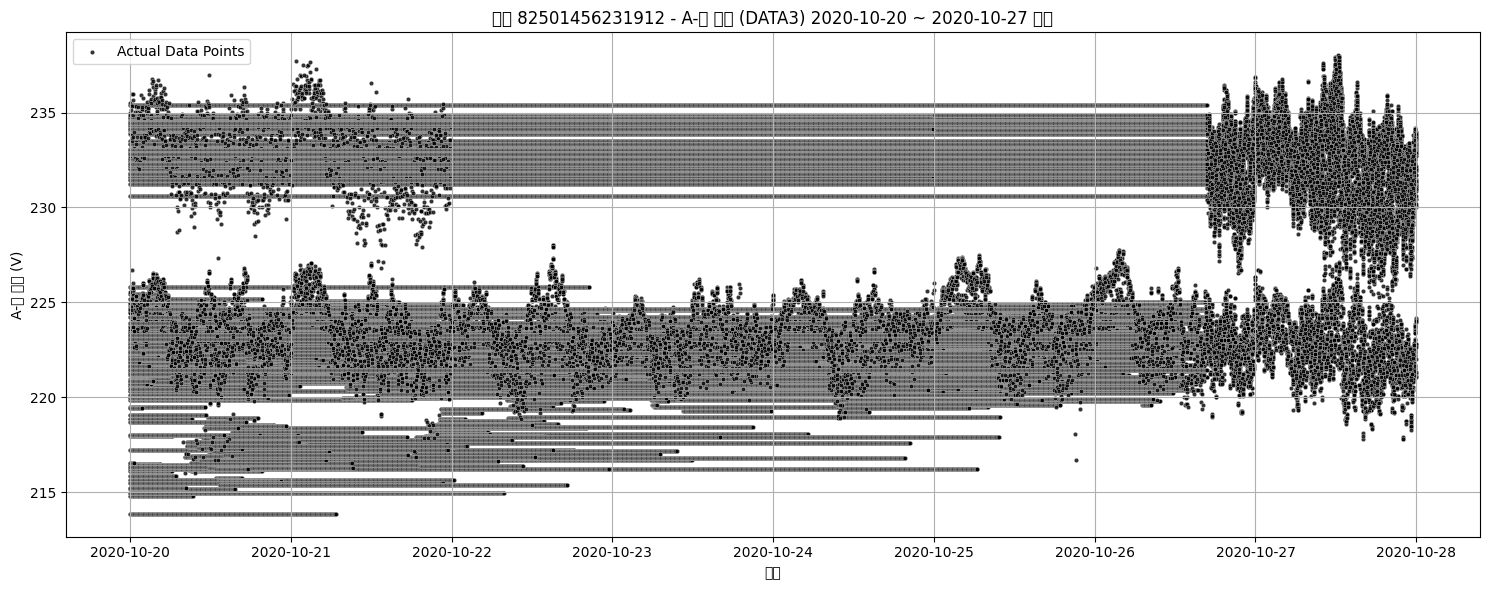

In [19]:
# --- 1. 특정 구간 (2020-10-20 ~ 2020-10-27) 시각화 ---
start_zoom_date = pd.to_datetime('2020-10-20 00:00')
end_zoom_date = pd.to_datetime('2020-10-27 23:59')

# 해당 기간의 데이터 필터링
# df_zoomed = df_prophet[(df_prophet['ds'] >= start_zoom_date) & (df_prophet['ds'] <= end_zoom_date)]
df_zoomed = df[(df['datetime'] >= start_zoom_date) & (df['datetime'] <= end_zoom_date)]
plt.figure(figsize=(15, 6))
sns.scatterplot(x='datetime', y='DATA3', data=df_zoomed, s=10, color='black', alpha=0.8, label='Actual Data Points')
# 누락된 부분은 선으로 연결하지 않고 점으로만 표현하는 것이 불연속성을 더 잘 보여줍니다.
# 만약 선으로 연결하고 싶다면 sns.lineplot을 사용하되, NaN값이 있을 경우 끊어집니다.

plt.title(f'장비 82501456231912 - A-상 전압 (DATA3) 2020-10-20 ~ 2020-10-27 확대')
plt.xlabel('시간')
plt.ylabel('A-상 전압 (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 10월 20일부터 10월 27일까지 고장 발생을 가정. 

In [20]:
# 이상치 전처리
# --- 고장 구간 (2020-10-20 ~ 2020-10-27) 데이터 NaN 처리 ---
fault_start = pd.to_datetime('2020-10-20 00:00')
fault_end = pd.to_datetime('2020-10-27 23:59:59') # 27일의 마지막 5분 데이터 포함

# 고장 구간에 해당하는 인덱스 찾기
fault_indices = (df_prophet['ds'] >= fault_start) & (df_prophet['ds'] <= fault_end)

# 해당 구간의 'y' 값을 NaN으로 설정
df_prophet = df_prophet.copy() # 원본 데이터 보존을 위해 복사
df_prophet.loc[fault_indices, 'y'] = np.nan

print(f"고장 구간 NaN 처리 완료. 총 {fault_indices.sum()}개의 데이터 포인트가 NaN으로 설정되었습니다.")
print(df_prophet.head())
print(df_prophet[(df_prophet['ds'] >= fault_start - pd.Timedelta(hours=1)) & (df_prophet['ds'] <= fault_end + pd.Timedelta(hours=1))]) # 고장 구간 주변 데이터 확인
print(df_prophet.tail())

고장 구간 NaN 처리 완료. 총 300152개의 데이터 포인트가 NaN으로 설정되었습니다.
                        ds        y
122438 2020-09-26 00:05:00  221.963
122473 2020-09-26 00:10:00  222.204
122274 2020-09-26 00:15:00  221.995
122480 2020-09-26 00:20:00  222.645
122738 2020-09-26 00:25:00  222.409
                        ds        y
152690 2020-10-19 23:00:00  222.371
432696 2020-10-19 23:00:00  224.523
134585 2020-10-19 23:00:00  222.615
253453 2020-10-19 23:00:00  221.874
145108 2020-10-19 23:00:00  217.966
...                    ...      ...
451597 2020-10-28 00:35:00  222.674
387105 2020-10-28 00:40:00  222.211
450295 2020-10-28 00:45:00  222.156
327159 2020-10-28 00:50:00  221.848
450253 2020-10-28 00:55:00  222.225

[301654 rows x 2 columns]
                        ds        y
245959 2020-11-02 13:10:00  221.184
450582 2020-11-02 13:15:00  220.809
450583 2020-11-02 13:20:00  220.809
450584 2020-11-02 13:25:00  220.809
324074 2020-11-02 13:30:00  220.463


#### 재 시각화

C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\3655322009.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\3655322009.py:19: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\3655322009.py:19: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\3655322009.py:19: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\3655322009.py:19: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppD

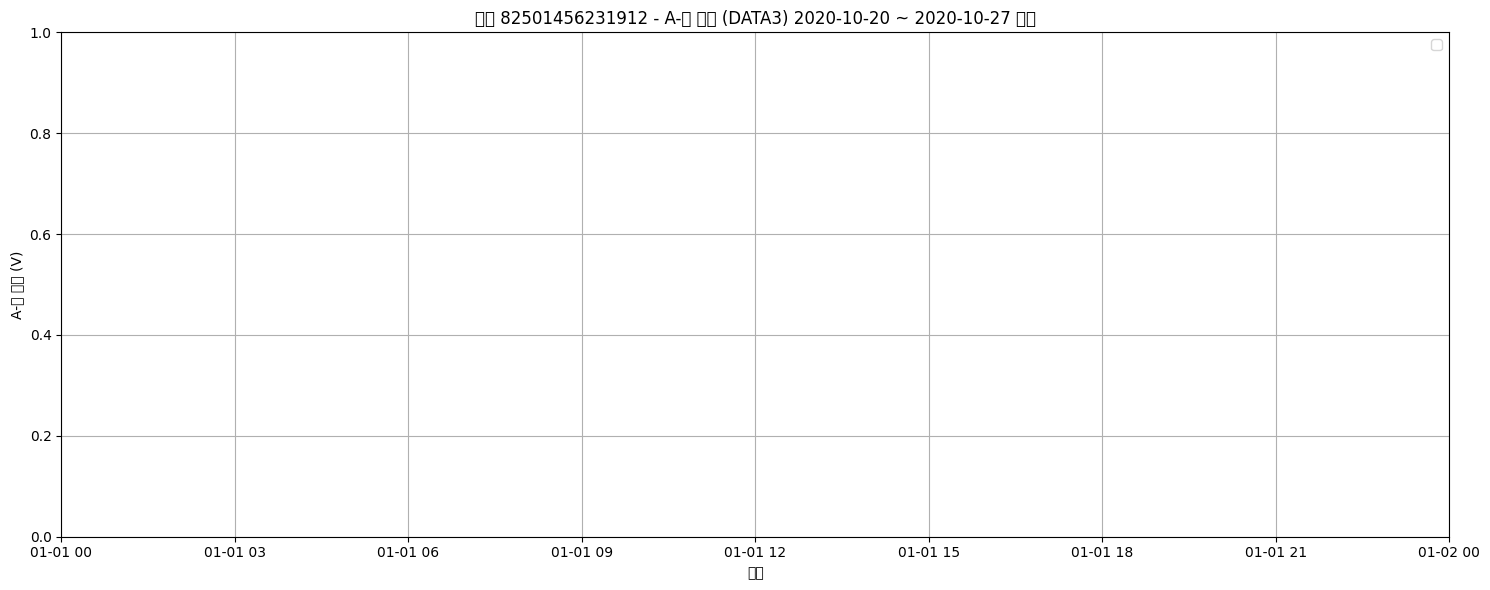

In [23]:
# --- 1. 특정 구간 (2020-10-20 ~ 2020-10-27) 시각화 ---
start_zoom_date = pd.to_datetime('2020-10-20 00:00')
end_zoom_date = pd.to_datetime('2020-10-27 23:59')

# 해당 기간의 데이터 필터링
df_zoomed = df_prophet[(df_prophet['ds'] >= start_zoom_date) & (df_prophet['ds'] <= end_zoom_date)]
# df_zoomed = df[(df['datetime'] >= start_zoom_date) & (df['datetime'] <= end_zoom_date)]
plt.figure(figsize=(15, 6))
# sns.scatterplot(x='datetime', y='DATA3', data=df_zoomed, s=10, color='black', alpha=0.8, label='Actual Data Points')
sns.scatterplot(x='ds', y='y', data=df_zoomed, s=10, color='black', alpha=0.8, label='Actual Data Points')
# 누락된 부분은 선으로 연결하지 않고 점으로만 표현하는 것이 불연속성을 더 잘 보여줍니다.
# 만약 선으로 연결하고 싶다면 sns.lineplot을 사용하되, NaN값이 있을 경우 끊어집니다.

plt.title(f'장비 82501456231912 - A-상 전압 (DATA3) 2020-10-20 ~ 2020-10-27 확대')
plt.xlabel('시간')
plt.ylabel('A-상 전압 (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:45 - cmdstanpy - INFO - Chain [1] done processing



Prophet 모델 학습 완료 (NaN 처리된 데이터 사용).

--- 1주일 예측 수행 ---

1주일 예측 결과 (최근 5개):
                       ds        yhat  yhat_lower  yhat_upper
12275 2020-11-09 13:10:00  221.807593  215.666085  227.409205
12276 2020-11-09 13:15:00  221.833131  215.763937  226.999521
12277 2020-11-09 13:20:00  221.859733  215.656835  227.319373
12278 2020-11-09 13:25:00  221.887297  215.418360  227.716376
12279 2020-11-09 13:30:00  221.915719  216.128517  227.459650

--- 1개월 예측 수행 ---

1개월 예측 결과 (최근 5개):
                       ds        yhat  yhat_lower  yhat_upper
18899 2020-12-02 13:10:00  224.718515  175.309184  270.549224
18900 2020-12-02 13:15:00  224.743352  175.094070  271.259882
18901 2020-12-02 13:20:00  224.769247  174.838574  271.565323
18902 2020-12-02 13:25:00  224.796096  175.175791  272.189123
18903 2020-12-02 13:30:00  224.823796  176.148201  271.830985

--- 예측 결과 시각화 ---


d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

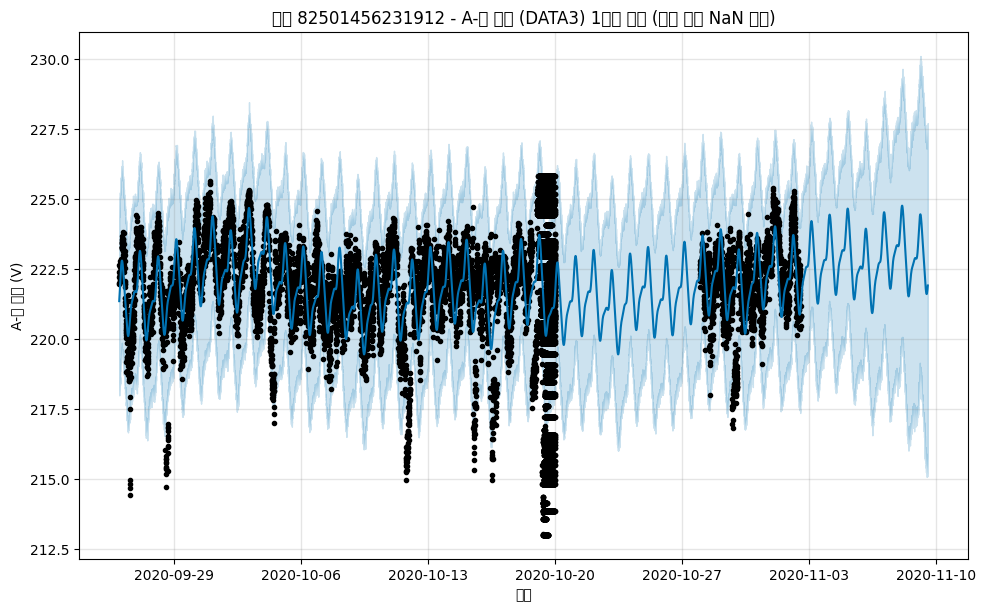

d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ind_data_valid\type_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


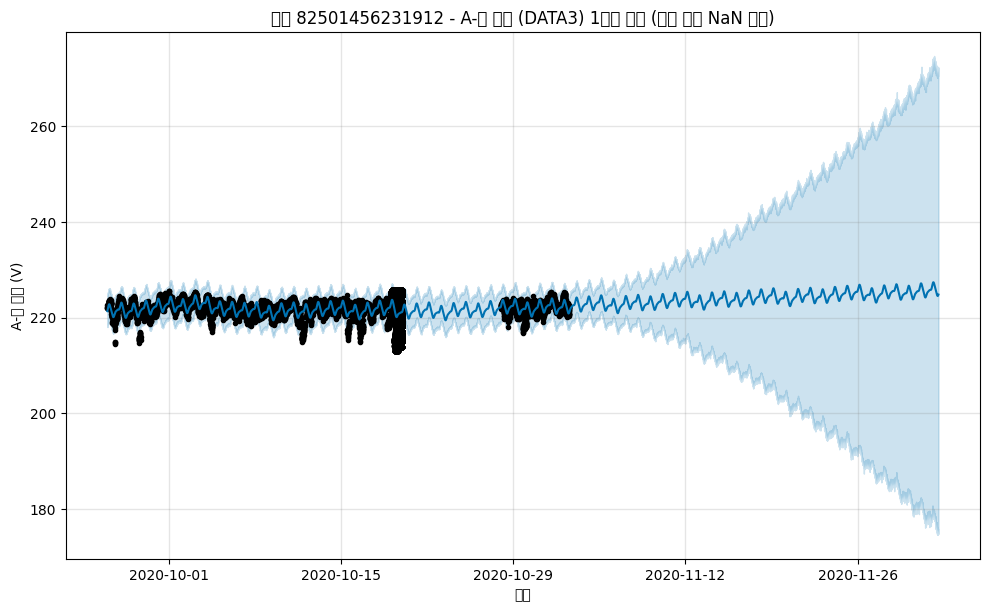

C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:54: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:54: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:54: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:54: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:54: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03,

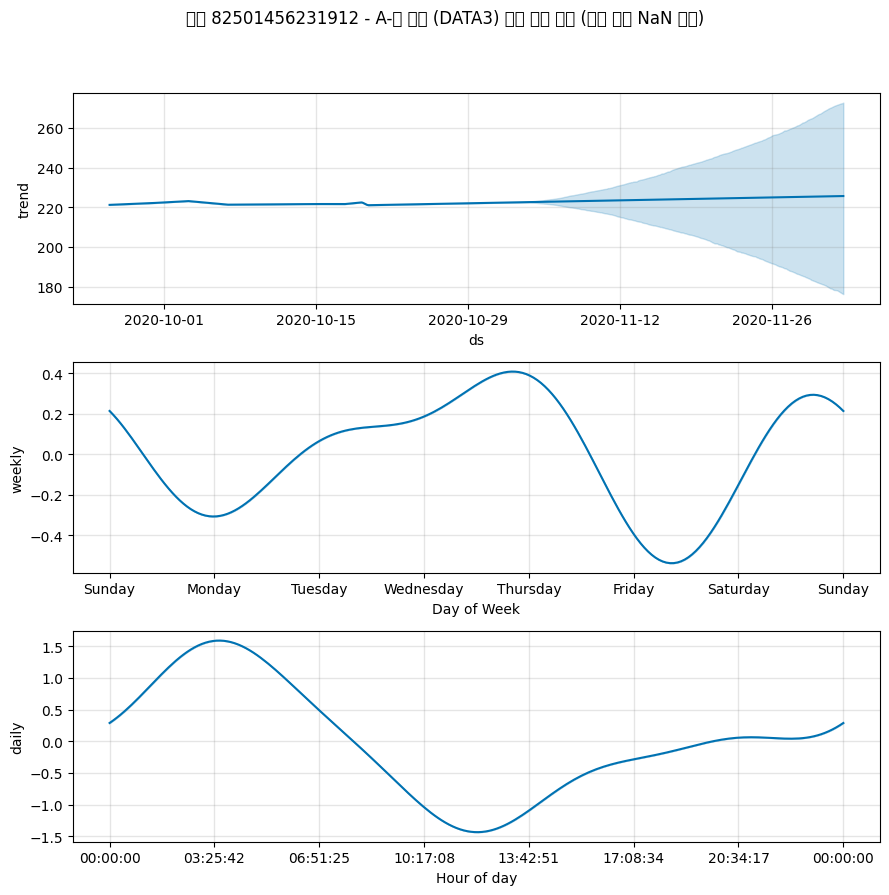

C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:70: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:70: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:70: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:70: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:70: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Digital-052\AppData\Local\Temp\ipykernel_6252\2247897740.py:70: UserWarning: Glyph 51109 (\N{HAN

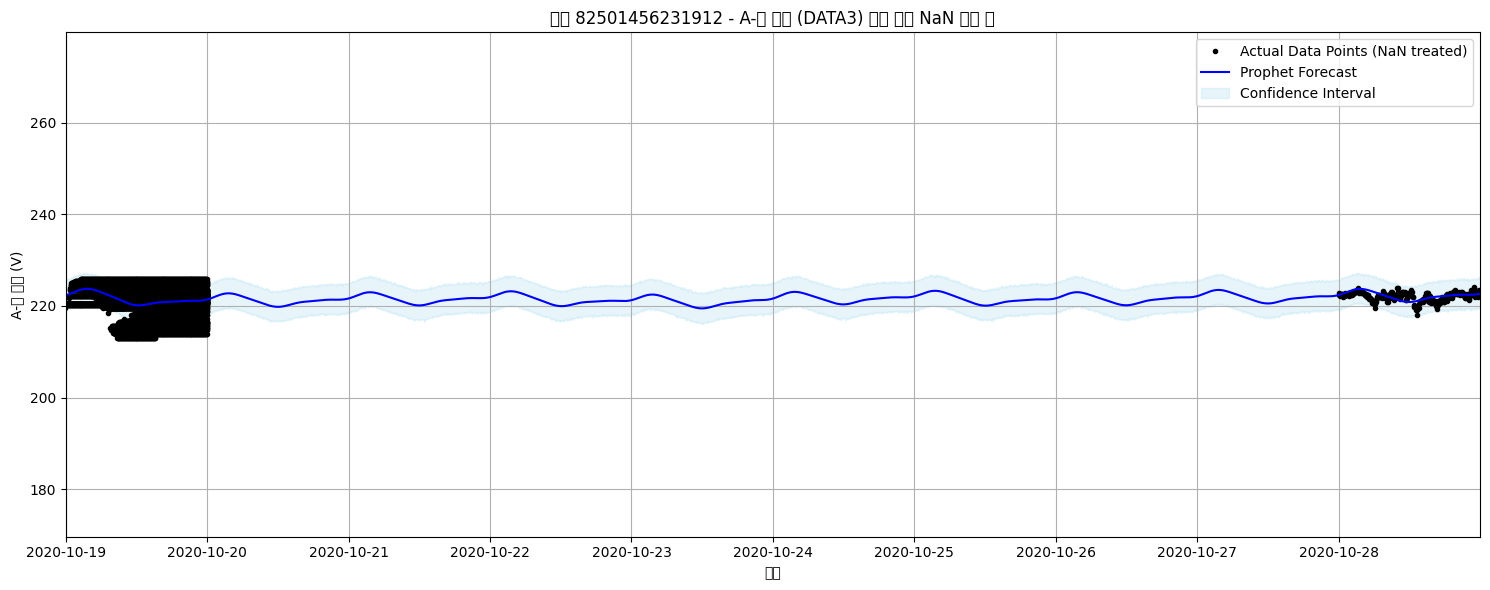

In [26]:
# --- Prophet 모델 학습 및 예측 ---

# Prophet 모델 초기화 및 학습
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False,
    changepoint_prior_scale=0.05
)
model.fit(df_prophet)

print("\nProphet 모델 학습 완료 (NaN 처리된 데이터 사용).")

# 미래 예측 기간 설정: 1주 (7일) 및 1달 (30일)
periods_7_days = 7 * 288 # 1주일 예측 (288 = 24시간 * 60분/5분)
periods_30_days = 30 * 288 # 1개월 예측

# 1주일 예측
print("\n--- 1주일 예측 수행 ---")
future_7_days = model.make_future_dataframe(periods=periods_7_days, freq='5min')
forecast_7_days = model.predict(future_7_days)

print("\n1주일 예측 결과 (최근 5개):")
print(forecast_7_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 1개월 예측
print("\n--- 1개월 예측 수행 ---")
future_30_days = model.make_future_dataframe(periods=periods_30_days, freq='5min')
forecast_30_days = model.predict(future_30_days)

print("\n1개월 예측 결과 (최근 5개):")
print(forecast_30_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# --- 예측 결과 시각화 ---
print("\n--- 예측 결과 시각화 ---")

# 전체 기간 + 1주일 예측 시각화
fig_7_days = model.plot(forecast_7_days)
plt.title(f'장비 82501456231912 - A-상 전압 (DATA3) 1주일 예측 (고장 구간 NaN 처리)')
plt.xlabel('시간')
plt.ylabel('A-상 전압 (V)')
plt.show()

# 전체 기간 + 1개월 예측 시각화
fig_30_days = model.plot(forecast_30_days)
plt.title(f'장비 82501456231912 - A-상 전압 (DATA3) 1개월 예측 (고장 구간 NaN 처리)')
plt.xlabel('시간')
plt.ylabel('A-상 전압 (V)')
plt.show()

# 예측 구성 요소 시각화 (추세, 계절성)
fig_components = model.plot_components(forecast_30_days)
plt.suptitle(f'장비 82501456231912 - A-상 전압 (DATA3) 예측 구성 요소 (고장 구간 NaN 처리)', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# 고장 구간 확대 시각화 (NaN 처리 확인)
plt.figure(figsize=(15, 6))
# plot_df를 사용하여 원본 데이터(y)와 예측선(yhat)을 함께 그립니다.
# df_prophet에서 y가 NaN인 부분은 자동으로 표시되지 않습니다.
plt.plot(df_prophet['ds'], df_prophet['y'], 'k.', label='Actual Data Points (NaN treated)')
plt.plot(forecast_30_days['ds'], forecast_30_days['yhat'], color='blue', label='Prophet Forecast')
plt.fill_between(forecast_30_days['ds'], forecast_30_days['yhat_lower'], forecast_30_days['yhat_upper'], color='skyblue', alpha=0.2, label='Confidence Interval')
plt.xlim(fault_start - pd.Timedelta(days=1), fault_end + pd.Timedelta(days=1)) # 고장 구간 전후로 확대
plt.title('장비 82501456231912 - A-상 전압 (DATA3) 고장 구간 NaN 처리 후')
plt.xlabel('시간')
plt.ylabel('A-상 전압 (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()